In [3]:
import pandas as pd
import os
from os.path import exists
import re
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
path = r'./datasets/Dane_o_przestepczosci_w_latach_19992021/'

In [4]:
"""
This fragment was used to trim folder names in data imported from public repository.
It should be only run once on freshly unpacked data.
"""

# for (dirpath, dirnames, filenames) in os.walk(path):
#     for filename in filenames:
#         re1= r'^(.*?) wg'
#         re2= '([^\/]+$)'
#         cutname = re.compile("(%s|%s)" % (re1, re2)).findall(dirpath)
        
#         if not (exists(cutname[0][1])):
#             os.rename(dirpath, cutname[0][1])
#         else:
#             os.rename(dirpath, cutname[0][1] + " cd")    

'\nThis fragment was used to trim folder names in data imported from public repository.\nIt should be only run once on freshly unpacked data.\n'

In [5]:
crimes = pd.DataFrame()
for (dirpath, dirnames, filenames) in os.walk(path):
    for filename in filenames:
        if re.search("przestepstwa", filename) != None:
            crime = re.findall(r"(?<=_)\w+", filename)
            df_name = pd.read_csv(r"{}".format(dirpath+"/"+filename), sep=';', skiprows=2, usecols=[*range(0,4)], encoding = 'cp1250')
            df_name['Type']= str(crime[0])
            crimes = pd.concat([crimes, df_name], ignore_index=True)
            

crimes = crimes.dropna()
crimes = crimes.rename(columns={'Jednostka podziału administracyjnego':'Area', 'Rok':'Year', 'Przestępstwa stwierdzone':'Crimes established', 'Przestępstwa wykryte':'Crimes detected'})

crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6118 entries, 0 to 6160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                6118 non-null   object 
 1   Year                6118 non-null   float64
 2   Crimes established  6118 non-null   object 
 3   Crimes detected     6118 non-null   object 
 4   Type                6118 non-null   object 
dtypes: float64(1), object(4)
memory usage: 286.8+ KB


In [6]:
crimes['Crimes detected'] = crimes['Crimes detected'].str.replace(' ', '')
crimes['Crimes detected'] = pd.to_numeric(crimes['Crimes detected'], errors='coerce')
crimes['Crimes established'] = crimes['Crimes established'].str.replace(' ', '')
crimes['Crimes established'] =  pd.to_numeric(crimes['Crimes established'], errors='coerce')
crimes['Year'] = pd.to_datetime(crimes['Year'].map('{:.0f}'.format), format='%Y')
# crimes['Year'] = crimes['Year'].dt.year
crimes = crimes[crimes['Type']!='17x7']
crimes.dropna(inplace=True)
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5643 entries, 0 to 6160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Area                5643 non-null   object        
 1   Year                5643 non-null   datetime64[ns]
 2   Crimes established  5643 non-null   float64       
 3   Crimes detected     5643 non-null   float64       
 4   Type                5643 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 264.5+ KB


In [7]:
"""
Crimes translations
"""
eng_names = {'kradziez':'theft', 'kradziez_samochodu':'car theft', 'włamania':'break in', 'nietrzezwi':'DUI',
       'bojka':'fight', 'drogowe':'traffic offenses', 'gospodarcze':'economic crimes', 'korupcja':'corruption', 'kryminalne':'criminal offences',
       'uszczerbek':'personal injury', 'uszkodzenie':'property damage', 'zabojstwo':'homicide', 'zgwalcenie':'rape'}
crimes = crimes.replace({"Type": eng_names})
crimes['Type'].unique()

array(['theft', 'car theft', 'break in', 'DUI', 'fight',
       'traffic offenses', 'economic crimes', 'corruption',
       'criminal offences', 'personal injury', 'property damage',
       'homicide', 'rape'], dtype=object)

In [8]:
simplified_Area = {'Polska':'Poland', 'woj. dolnośląskie':' dolnośląskie', 'woj. kujawsko-pomorskie':'kujawsko-pomorskie',
       'woj. lubelskie':'lubelskie', 'woj. lubuskie':'lubuskie', 'woj. łódzkie':'łódzkie',
       'woj. małopolskie':'małopolskie',
       'woj. mazowieckie (KWP z/s w Radomiu i KSP Warszawa)':'mazowieckie',
       'woj. opolskie':'opolskie', 'woj. podkarpackie':'podkarpackie', 'woj. podlaskie':'podlaskie',
       'woj. pomorskie':'pomorskie', 'woj. śląskie':'śląskie', 'woj. świętokrzyskie':'świętokrzyskie',
       'woj. warmińsko-mazurskie':'warmińsko-mazurskie', 'woj. wielkopolskie':'wielkopolskie',
       'woj. zachodniopomorskie':'zachodniopomorskie', 'teren działania KWP z/s w Radomiu':'Radom',
       'teren działania KSP Warszawa':'Warsaw'}
crimes = crimes.replace({"Area": simplified_Area})
crimes['Area'].unique()

array(['Poland', ' dolnośląskie', 'kujawsko-pomorskie', 'lubelskie',
       'lubuskie', 'łódzkie', 'małopolskie', 'mazowieckie', 'opolskie',
       'podkarpackie', 'podlaskie', 'pomorskie', 'śląskie',
       'świętokrzyskie', 'warmińsko-mazurskie', 'wielkopolskie',
       'zachodniopomorskie', 'Radom', 'Warsaw'], dtype=object)

In [9]:
warsaw_crimes = crimes[crimes['Area']=='Warsaw']
warsaw_crimes = warsaw_crimes[warsaw_crimes['Type']!='criminal offences']
warsaw_crimes.reset_index(inplace=True, drop=True)
warsaw_crimes.head()

,Area,Year,Crimes established,Crimes detected,Type
0,Warsaw,2021-01-01,18642.0,4258.0,theft
1,Warsaw,2020-01-01,15954.0,3550.0,theft
2,Warsaw,2019-01-01,18706.0,3976.0,theft
3,Warsaw,2018-01-01,17386.0,3738.0,theft
4,Warsaw,2017-01-01,17441.0,3608.0,theft


In [10]:
warsaw_crimes.groupby('Type')['Crimes detected'].sum().sort_values()

Type
homicide              1428.0
rape                  1638.0
car theft             6949.0
corruption            8206.0
fight                 9274.0
personal injury      13779.0
property damage      27724.0
break in             36945.0
theft                94196.0
economic crimes     137368.0
DUI                 140996.0
traffic offenses    166461.0
Name: Crimes detected, dtype: float64

C:\Users\chmie\AppData\Local\Temp\ipykernel_50220\3567644199.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in warsaw_crimes.groupby(['Type']):


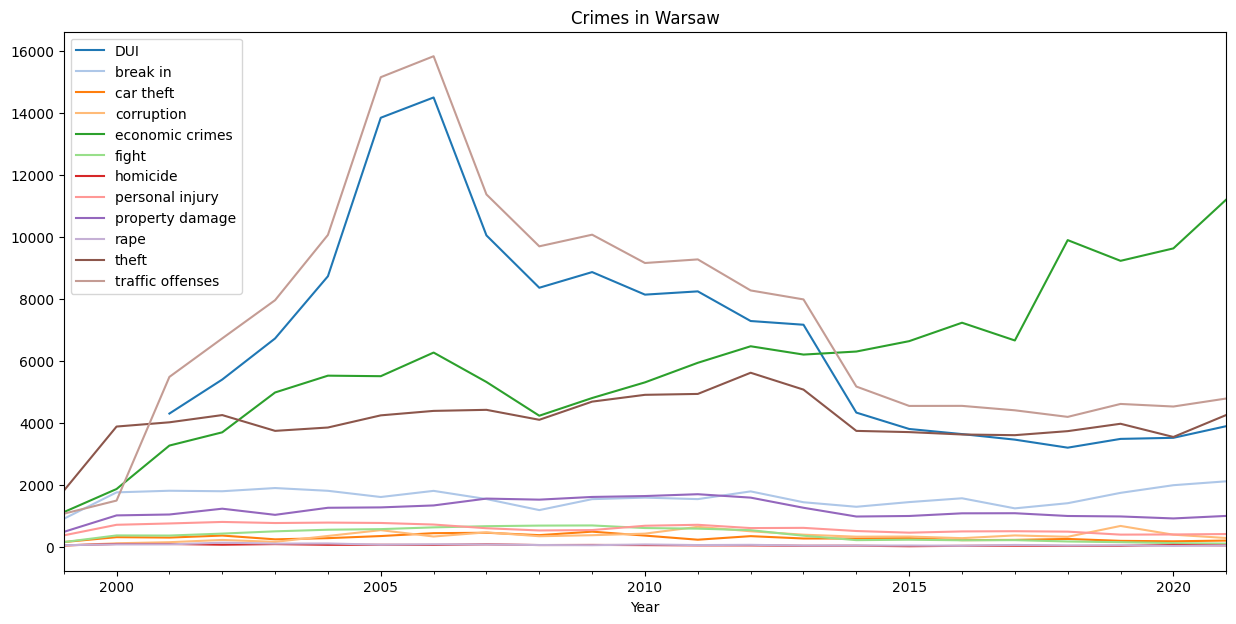

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
colors = plt.rcParams["axes.prop_cycle"]()
cmap=plt.get_cmap('tab20')
i=0

for key, grp in warsaw_crimes.groupby(['Type']):
    c = next(colors)["color"]
    ax = grp.plot(ax=ax, kind='line', x='Year', y='Crimes detected',c=cmap(i), label=key)
    i+=1
    
plt.title('Crimes in Warsaw')
plt.legend(loc='best')
plt.grid()
plt.show()

In [12]:
waw_mean_crimes = warsaw_crimes.groupby('Type')['Crimes detected'].mean().sort_values()
waw_mean_crimes = waw_mean_crimes.reset_index()
common_mean = waw_mean_crimes[waw_mean_crimes['Crimes detected'] > 4000]
common_crime_names = common_mean['Type'].tolist()
print(waw_mean_crimes)

                Type  Crimes detected
0           homicide        62.086957
1               rape        71.217391
2          car theft       302.130435
3         corruption       356.782609
4              fight       403.217391
5    personal injury       599.086957
6    property damage      1205.391304
7           break in      1606.304348
8              theft      4095.478261
9    economic crimes      5972.521739
10               DUI      6714.095238
11  traffic offenses      7237.434783


C:\Users\chmie\AppData\Local\Temp\ipykernel_50220\3696784538.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in warsaw_crimes.groupby(['Type']):


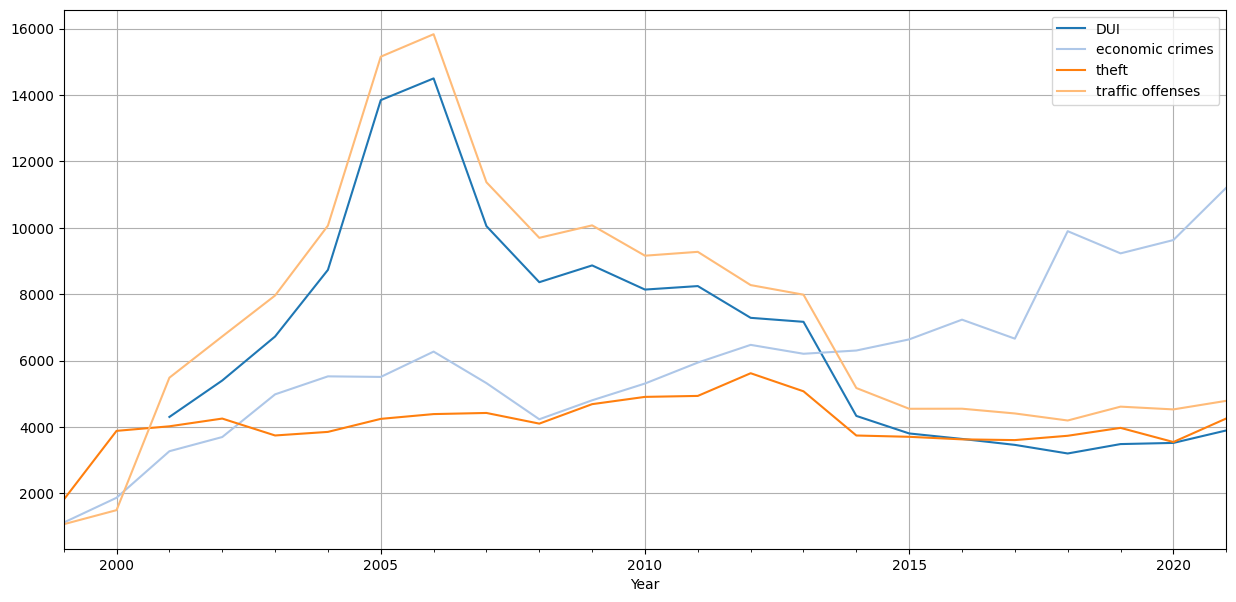

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
colors = plt.rcParams["axes.prop_cycle"]()
cmap=plt.get_cmap('tab20')
i=0

for key, grp in warsaw_crimes.groupby(['Type']):
    if key in common_crime_names:
        c = next(colors)["color"]
        ax = grp.plot(ax=ax, kind='line', x='Year', y='Crimes detected',c=cmap(i), label=key)
        i+=1
    

plt.legend(loc='best')
plt.grid()
plt.show()

C:\Users\chmie\AppData\Local\Temp\ipykernel_50220\4284915011.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in warsaw_crimes.groupby(['Type']):


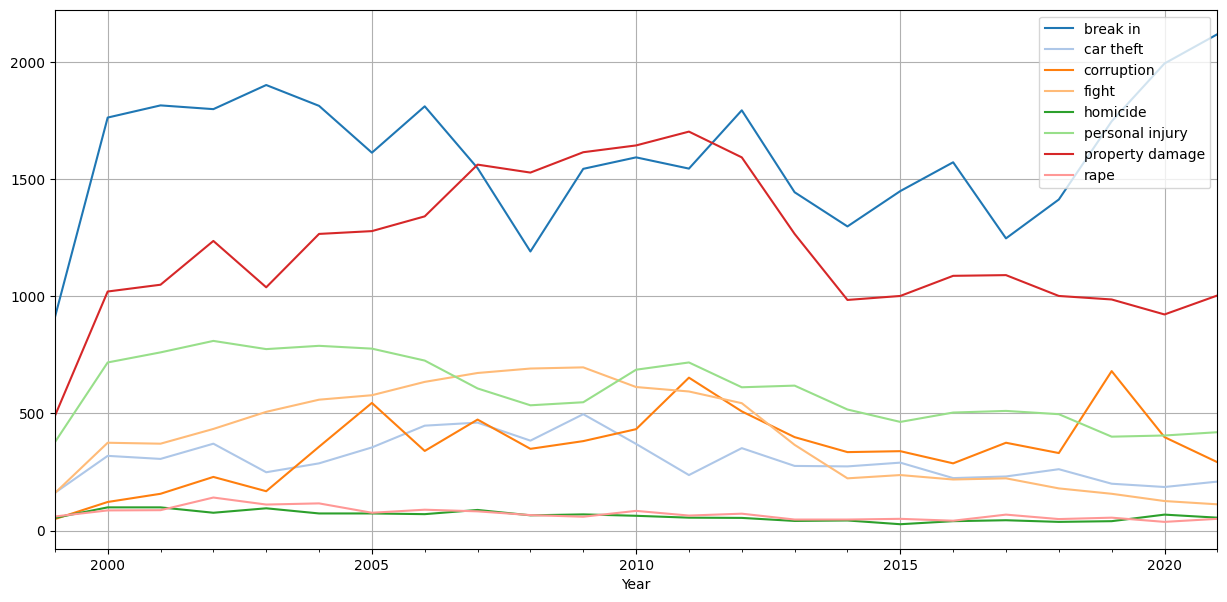

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
colors = plt.rcParams["axes.prop_cycle"]()
cmap=plt.get_cmap('tab20')
i=0

for key, grp in warsaw_crimes.groupby(['Type']):
    if key not in common_crime_names:
        c = next(colors)["color"]
        ax = grp.plot(ax=ax, kind='line', x='Year', y='Crimes detected',c=cmap(i), label=key)
        i+=1
    

plt.legend(loc='best')
plt.grid()
plt.show()

In [15]:
country_crimes = crimes[crimes['Area']=='Poland']
country_crimes = country_crimes[country_crimes['Type']!='criminal offences']
country_crimes.reset_index(inplace=True, drop=True)
country_crimes.head()

,Area,Year,Crimes established,Crimes detected,Type
0,Poland,2021-01-01,109768.0,43090.0,theft
1,Poland,2020-01-01,98886.0,37699.0,theft
2,Poland,2019-01-01,103910.0,36307.0,theft
3,Poland,2018-01-01,100372.0,33142.0,theft
4,Poland,2017-01-01,108248.0,35359.0,theft


In [16]:
pol_mean_crimes = country_crimes.groupby('Type')['Crimes detected'].mean().sort_values()
# pol_mean_crimes = pol_mean_crimes.reset_index()
# pol_common_mean = pol_common_mean[pol_common_mean['Crimes detected'] > 4000]
# pol_common_crime_names = pol_common_mean['Type'].tolist()
# print(waw_mean_crimes)
print(pol_mean_crimes)
print(waw_mean_crimes)

Type
homicide               716.521739
rape                  1400.000000
car theft             3924.260870
corruption            7392.521739
fight                 7877.956522
personal injury      12256.434783
property damage      16007.347826
break in             46687.391304
theft                56467.782609
DUI                 115265.619048
traffic offenses    119913.956522
economic crimes     134468.521739
Name: Crimes detected, dtype: float64
                Type  Crimes detected
0           homicide        62.086957
1               rape        71.217391
2          car theft       302.130435
3         corruption       356.782609
4              fight       403.217391
5    personal injury       599.086957
6    property damage      1205.391304
7           break in      1606.304348
8              theft      4095.478261
9    economic crimes      5972.521739
10               DUI      6714.095238
11  traffic offenses      7237.434783


C:\Users\chmie\AppData\Local\Temp\ipykernel_50220\2567208034.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in country_crimes.groupby(['Type']):
C:\Users\chmie\AppData\Local\Temp\ipykernel_50220\2567208034.py:13: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in warsaw_crimes.groupby(['Type']):


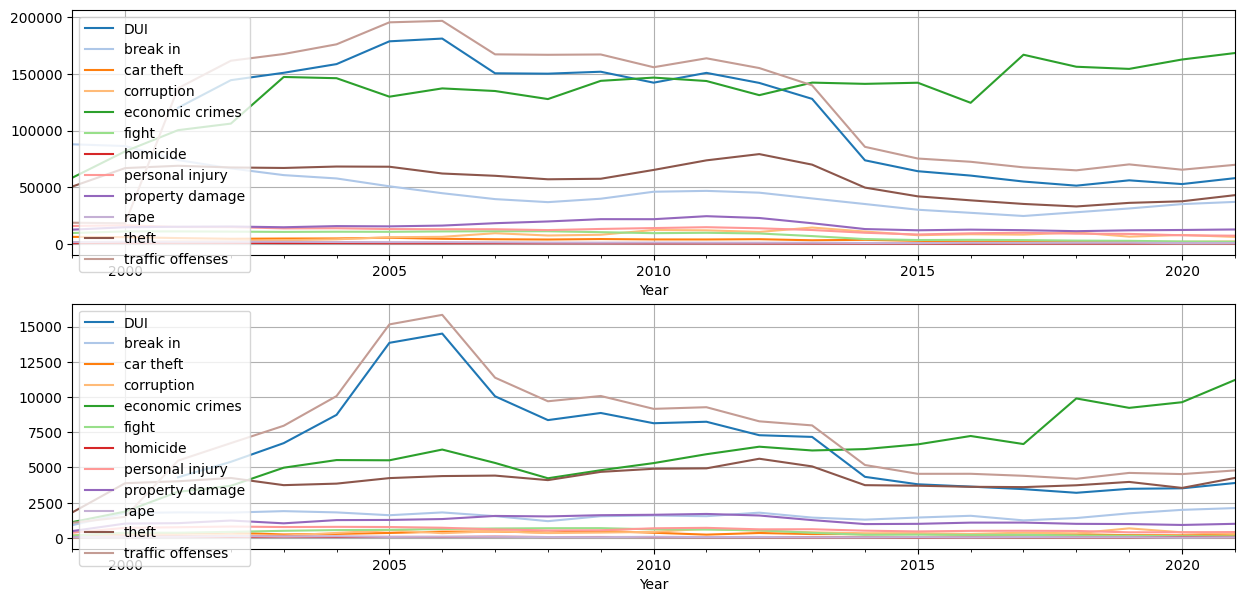

In [17]:
fig, ax = plt.subplots(2, figsize=(15,7))
colors = plt.rcParams["axes.prop_cycle"]()
plt.rcParams['axes.grid'] = True
cmap=plt.get_cmap('tab20')
i=0

for key, grp in country_crimes.groupby(['Type']):
    c = next(colors)["color"]
    ax[0] = grp.plot(ax=ax[0], kind='line', x='Year', y='Crimes detected',c=cmap(i), label=key)
    i+=1
   
i=0
for key, grp in warsaw_crimes.groupby(['Type']):
    c = next(colors)["color"]
    ax[1] = grp.plot(ax=ax[1], kind='line', x='Year', y='Crimes detected',c=cmap(i), label=key)
    i+=1

plt.legend(loc='best')
plt.show()